In [8]:
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Add local functions to the path
sys.path.append(os.path.join(os.pardir, 'src'))
from data import load_data

In [2]:
filepath = load_data.ORG

In [3]:
data = load_data.loadData(filepath)

## Resampling

In [5]:
data = data.resample('B').ffill()

In [6]:
data.shape

(3129, 6)

In [9]:
decompClose = STL(data['Close'], period = 650, robust = True).fit()
seasonal, trend, resid = decompClose.seasonal, decompClose.trend, decompClose.resid

decompOpen = STL(data['Open'], period = 650, robust = True).fit()
seasonal, trend, resid = decompOpen.seasonal, decompOpen.trend, decompOpen.resid

decompHigh = STL(data['High'], period = 650, robust = True).fit()
seasonal, trend, resid = decompHigh.seasonal, decompHigh.trend, decompHigh.resid

decompLow = STL(data['Low'], period = 650, robust = True).fit()
seasonal, trend, resid = decompLow.seasonal, decompLow.trend, decompLow.resid

Text(0.5, 1.0, 'Lowest Price Residuals')

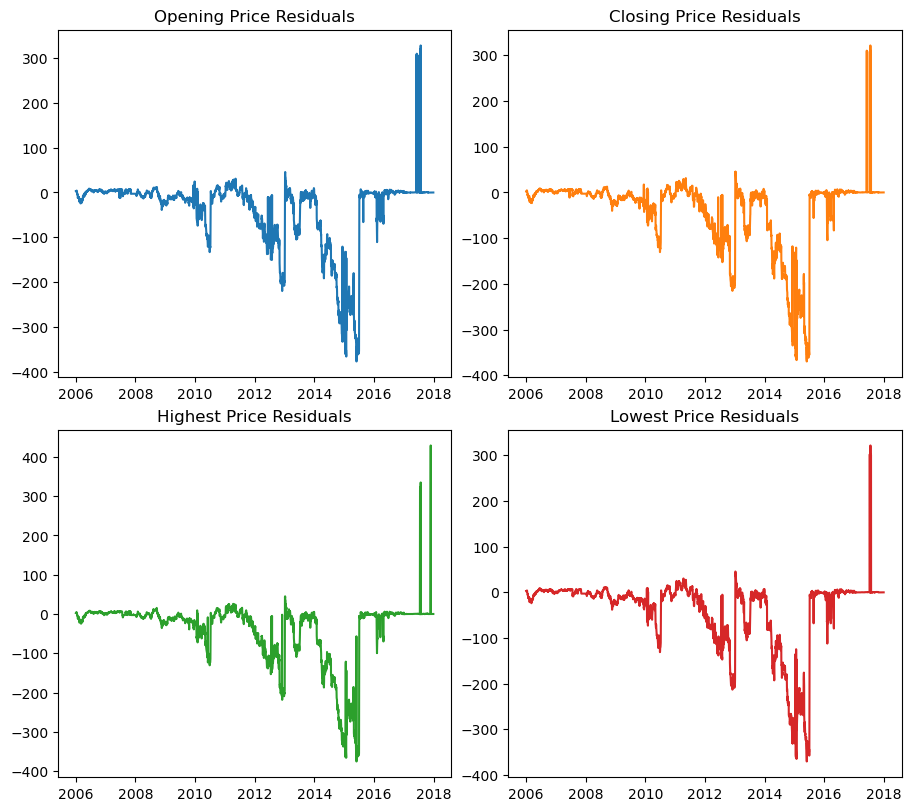

In [10]:
fig = plt.figure(figsize=(9, 8), constrained_layout=True)
spec = fig.add_gridspec(2, 2)

ax0 = fig.add_subplot(spec[0, 0])
ax0.plot(decompOpen.resid)
ax0.set_title('Opening Price Residuals')

ax0 = fig.add_subplot(spec[0, 1])
ax0.plot(decompClose.resid, 'tab:orange')
ax0.set_title('Closing Price Residuals')

ax10 = fig.add_subplot(spec[1, 0])
ax10.plot(decompHigh.resid, 'tab:green')
ax10.set_title('Highest Price Residuals')

ax11 = fig.add_subplot(spec[1, 1])
ax11.plot(decompLow.resid, 'tab:red')
ax11.set_title('Lowest Price Residuals')

In [11]:
res_mean = decompClose.resid.mean()
resid_std = decompClose.resid.std()

lower_bound = res_mean - 4*resid_std
upper_bound = res_mean + 4*resid_std

In [12]:
closePrices = data['Close']
anomalies = closePrices[(decompClose.resid < lower_bound) | (decompClose.resid > upper_bound)]
anomalies

Date
2015-01-19     290.74
2015-01-26     309.66
2015-01-27     306.75
2015-01-29     311.78
2015-05-29     429.23
2015-06-01     430.92
2015-06-02     430.99
2015-06-22     436.29
2017-06-05    1011.34
2017-07-12    1006.51
2017-07-18    1024.45
2017-07-19    1026.87
2017-07-20    1028.70
2017-07-26    1052.80
Name: Close, dtype: float64

In [13]:
clf = LocalOutlierFactor(n_neighbors=20, contamination = 0.002)
outlier_scores = clf.fit_predict(resid.to_numpy().reshape(-1, 1))
outlier_indices = outlier_scores == -1
data.loc[outlier_indices]

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2013-01-08,267.07,268.98,263.57,266.38,3012356,AMZN
2013-01-09,268.17,269.50,265.40,266.35,2265991,AMZN
2017-07-12,1000.65,1008.55,998.10,1006.51,3608574,AMZN
2017-07-19,1025.00,1031.59,1022.50,1026.87,2963964,AMZN
2017-07-20,1031.59,1034.97,1022.52,1028.70,3097487,AMZN
2017-07-26,1043.20,1053.20,1043.20,1052.80,2921253,AMZN
2017-07-27,1069.55,1083.31,1040.18,1046.00,10991715,AMZN


In [14]:
data.tail(10)

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-18,1187.37,1194.78,1180.91,1190.58,2947625,AMZN
2017-12-19,1189.15,1192.97,1179.14,1187.38,2587792,AMZN
2017-12-20,1190.50,1191.00,1176.00,1177.62,2371166,AMZN
2017-12-21,1175.90,1179.17,1167.64,1174.76,2123117,AMZN
2017-12-22,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-25,1172.08,1174.62,1167.83,1168.36,1585054,AMZN
2017-12-26,1168.36,1178.32,1160.55,1176.76,2005187,AMZN
2017-12-27,1179.91,1187.29,1175.61,1182.26,1867208,AMZN
2017-12-28,1189.00,1190.10,1184.38,1186.10,1841676,AMZN
